In [13]:
import pandas as pd
import io
import matplotlib.pyplot as plt


# Seus dados (substitua os dados pelos seus)
dados = """
 r  b   swpd  livre   buff  cache   si   so    bi    bo   in   cs us sy id wa st
 1  0      0 1152860  52940 4069336    0    0   177  4021  308  621 17  4 78  1  0
 1  0      0 1136736  52940 4069048    0    0     0     4 1078 3659  6  3 92  0  0
 0  0      0 1126164  52956 4078548    0    0   174    84 1165 4261  7  4 89  0  0
 0  0      0 1119120  52964 4081476    0    0   766    96 1014 3457  6  3 91  0  0
 0  0      0 1109808  52964 4090160    0    0   552   432  545 1282  3  1 96  0  0
 1  0      0 1080868  52964 4107080    0    0  4434     0 2038 6330 20  8 72  0  0
 0  0      0 1085992  52964 4107296    0    0   278     0 2039 5928 19  4 77  0  0
 0  0      0 1086940  52972 4096188    0    0     0    32 1349 4347 12  5 83  0  0
 0  0      0 1103616  52980 4087008    0    0     4    24  902 2490  8  2 90  0  0
 1  0      0 1094720  52980 4100268    0    0  2013     0 1985 3853 15  4 81  0  0
 2  0      0 1061136  52996 4118088    0    0  1076   128 2599 8894 22 10 67  0  0
 1  0      0 413944  53040 4119756    0    0  2404     0 2581 8725 30 12 58  1  0
 1  0      0 126144  53048 3893156    0    0  1160    60 7389 8378 21 16 62  0  0
 3  0    512 126880  55512 3377064    0   40 14988  2116 6343 18703 48 25 26  2  0
 1  0    512 121896  55692 2621112    0    0  3944  1824 8243 12536 20 27 53  1  0
 2  0    512 125588  55812 1976828    0    0   168   324 7749 6866 15 27 58  0  0
 5  0   3584 125404  55936 1811352    0 2856  1340  3620 10346 8415 69 15 17  0  0
 8  0   8192 128144  56540 1782672    0 4908  3096  5328 5678 13701 90 10  0  0  0
 6  0  10496 132884  56436 1753856    0 2248 11112  2592 6668 12959 85 15  0  0  0
10  0  11776 114900  56744 1721640    0 1368  2184  2920 7414 21644 88 12  0  0  0
 6  0  27904 125520  56476 1657636    0 16028  1812 17208 4703 25822 84 16  0  0  0
 5  0  88320 129424  55572 1600288    0 60636   324 62960 6883 26768 76 24  0  0  0
 4  0 100608 138856  55508 1583596   32 12120   288 12692 4452 22011 87 13  0  0  0
 4  0 100608 127348  55532 1586624    0    0   412   792 2152 2921 90 10  0  0  0
 4  0 100608 135172  55552 1589192    0    0    48   568 2191 3450 94  6  0  0  0
 4  0 108544 133236  55400 1602340    0 7952    16  7952 1842 1971 92  8  0  0  0
 4  0 108544 120872  55432 1601708    0    0   124  3984 1866 2404 92  8  0  0  0
 8  0 121600 126016  55064 1616264    0 13100  1284 13100 3976 7150 89 12  0  0  0
 4  0 122624 138140  54972 1603596    0 1072   112  1072 2527 4928 90 10  0  0  0
 4  0 122624 126280  54972 1610312    0    0     0     0 1512 1357 93  6  0  0  0
 6  0 124928 140168  54900 1618540   32 2232   506  2304 3085 5654 87 14  0  0  0
 4  0 128256 156124  54796 1621664    0 3264     0  3264 3152 6108 90 11  0  0  0
 4  0 128256 140792  54796 1622280    0    0     0     0 29588 7462 87 14  0  0  0
 4  0 128256 160020  54812 1603260    0    0     0   240 1706 2102 93  7  0  0  0
 4  0 128256 202896  54820 1563948    0    0     0   268 1791 1990 95  5  0  0  0
 1  0 128256 2945752  54820 1561008    4    0     4     0 1389 1643 59 12 29  0  0
 1  0 128256 2215284  54828 1551448    0  112     0   208 1493 2580 20 10 71  0  0
 1  0 128768 1113416  54836 1543716    0  304     0   388 1150 2466 15 15 70  0  0
 1  0 144128 521912  54788 1523680    0 15488     0 15488 1621 2655  4 26 71  0  0
 4  0 151296 326744  54780 1508448    0 7088     0  7088 1478 1610 76  7 17  0  0
 4  0 151296 310352  54788 1508332    4    0     4    76 1679 2494 95  5  0  0  0
 5  0 151296 303076  54788 1508344    0    0     0     0 1698 2134 97  3  0  0  0
 6  0 151296 301592  54804 1508392    0    0     0   120 1711 1989 96  4  0  0  0
 4  0 151296 301588  54820 1500048    8    0   280   312 1622 1945 96  5  0  0  0
 4  0 151296 314980  54828 1499988    0    0     0   140 1686 1997 97  3  0  0  0
 4  0 151296 328200  54828 1496304    0    0     0     0 1398 1175 97  3  0  0  0
 4  0 151296 323372  54836 1494080    0    0     0    88 1518 1536 97  3  0  0  0
 5  0 151296 322960  54844 1493972    0    0     0    64 1475 1489 97  3  0  0  0
 4  0 151296 320376  54844 1495304   12    0    12     0 1737 2123 97  3  0  0  0
 5  0 151296 314564  54864 1494948    4    0   771   144 1465 1487 96  4  0  0  0
 4  0 150784 309604  55032 1498540  856    0  4647     0 3316 4514 93  8  0  0  0
 6  0 150784 307648  55040 1497620    0    0     4    96 2140 2889 95  5  0  0  0
 0  0 150784 3453536  55040 1499072    0    0    80  1796 2332 4867 48 12 40  0  0
 0  0 150784 3463376  55056 1495300    0    0     0   372 2618 4711 20  3 77  0  0
 0  0 150784 3461864  55064 1497592    0    0     0    60  721 1766  3  2 94  0  0
 0  0 150784 3462872  55064 1497488    0    0     0     0  595 1370  3  2 96  0  0
 0  0 150784 3462872  55088 1495424    0    0     0   332  461 1065  2  1 97  0  0
 0  0 150784 3469696  55088 1497764    0    0     0   856  747 1815  4  2 94  0  0
 0  0 150784 3469444  55096 1497612    0    0     0   136  545 1209  2  2 96  0  0
 0  0 150784 3471460  55104 1495436    0    0     0    48  453  921  1  0 98  0  0
"""

# Criar um DataFrame com os dados
df = pd.read_csv(io.StringIO(dados), sep='\s+')

# Exibir o DataFrame
colunas_relevantes = ['swpd', 'livre', 'si', 'so', 'us', 'sy']
df_relevante = df[colunas_relevantes]

# Exibir o DataFrame resultante
df_relevante


,swpd,livre,si,so,us,sy
0,0,1152860,0,0,17,4
1,0,1136736,0,0,6,3
2,0,1126164,0,0,7,4
3,0,1119120,0,0,6,3
4,0,1109808,0,0,3,1
5,0,1080868,0,0,20,8
6,0,1085992,0,0,19,4
7,0,1086940,0,0,12,5
8,0,1103616,0,0,8,2
9,0,1094720,0,0,15,4


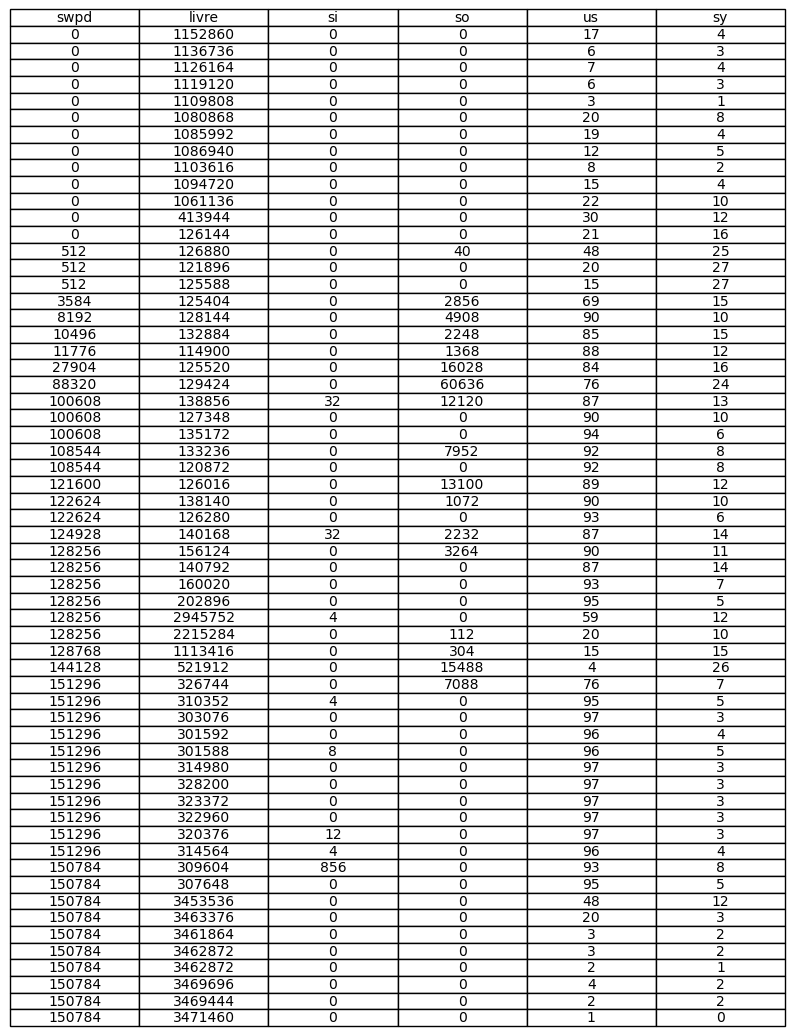

In [14]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111, frame_on=False)  # Remover a moldura
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
table = plt.table(cellText=df_relevante.values, colLabels=df_relevante.columns, cellLoc='center', loc='center')

# Salvar a tabela como uma imagem
plt.savefig('tabela.png', bbox_inches='tight', pad_inches=0.05)